In [60]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import math
import pandas as pd

In [61]:
no_voice_list = pd.read_csv('no_voice_files.csv', header=None)
filename_list = [name.split("\\")[-1] for name in no_voice_list[0]]

In [62]:
df = pd.read_csv('MLNS_Insects_Fams_05212024.csv')

In [64]:
#This creates the new CSV with mfcc coefficients. Ignores files with length < .5 seconds. No need to run since the csv is now in the git!
ct = 0
n= 40
for name in filename_list:
    #change this file path to the chirp_bucket_2 folder
    file_path = '../../../chirp/'+name
    song, sr = librosa.load(file_path)
    if song.shape[0] > sr/2:
        lib = librosa.feature.mfcc(y=song, sr=sr, n_mfcc=n)
        for i in range(0,n):
            df.at[df.loc[df['cat_num']==int(name[:-4])].index[0], 'mfcc_'+str(i)+'_avg'] = lib[i].mean()
            df.at[df.loc[df['cat_num']==int(name[:-4])].index[0], 'mfcc_'+str(i)+'_var'] = lib[i].var()
           # df['mfcc_'+str(i)+'_avg']=lib[i].mean()
           # df['mfcc_'+str(i)+'_var']=lib[i].var()
        ct+=1
        if ct % 100 == 0:
            df.to_csv("MLNS_with_mfcc_stats_05232024.csv")

In [2]:
#Load the csv with mfcc coefficients.
df = pd.read_csv('MLNS_with_mfcc_stats_05232024.csv')

/var/folders/5z/7fkzpcz93gz6mqgh9vjgfymm0000gn/T/ipykernel_54989/1583749826.py:1: DtypeWarning: Columns (26,32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MLNS_with_mfcc_stats_05232024.csv')


In [65]:
#This creates a new dataframe only containing only etries with voice.
df2=df[0:0]
for name in filename_list:
    df2=pd.concat([df2, df.loc[df['cat_num']==int(name[:-4])]], ignore_index=True)

In [66]:
df2['scientific_name'].value_counts()

scientific_name
Gryllus                        722
Anaxipha                       308
Gryllus rubens                 228
Oecanthus quadripunctatus      220
Scudderia texensis             125
                              ... 
Phoebolampta excellens           1
Orchelimum campestre             1
Orchelimum carinatum             1
Bucrates                         1
Neoconocephalus carbonarius      1
Name: count, Length: 318, dtype: int64

(array([ 1.,  3., 14., 28., 76., 74., 64., 18., 19.,  5.]),
 array([-54.83401489, -40.38970566, -25.94539261, -11.50108242,
          2.94322824,  17.38753891,  31.83185005,  46.27616119,
         60.72047043,  75.16477966,  89.60909271]),
 <BarContainer object of 10 artists>)

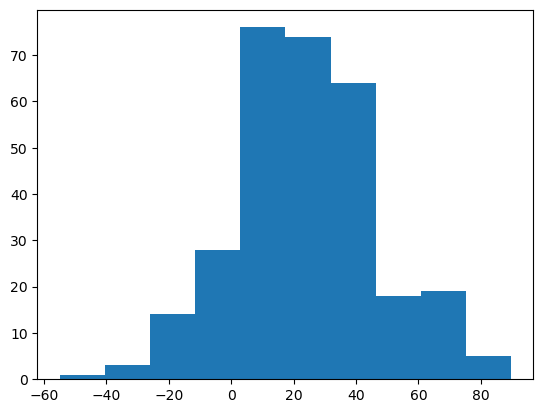

In [101]:
plt.hist(df2.loc[df2['scientific_name'] == 'Anaxipha']['mfcc_3_avg'])

In [98]:
df2.loc[(df2['scientific_name'] == 'Gryllus') & (df2['mfcc_2_avg'] < -30) ]

,cat_num,format,common_name,fam_or_subfam,genus,scientific_name,background_species,recordist,date,year,...,mfcc_35_avg,mfcc_35_var,mfcc_36_avg,mfcc_36_var,mfcc_37_avg,mfcc_37_var,mfcc_38_avg,mfcc_38_var,mfcc_39_avg,mfcc_39_var
4565,137243,Audio,Field Crickets,Gryllinae,Gryllus,Gryllus,NaN,Thomas J. Walker,5/23/1993,1993.0,...,-0.852379,10.707716,-3.939752,9.283057,0.564670,9.128748,-5.288984,8.048080,4.059854,7.895538
4566,137244,Audio,Field Crickets,Gryllinae,Gryllus,Gryllus,NaN,Thomas J. Walker,5/23/1993,1993.0,...,-1.862309,8.370490,-2.463058,8.441731,0.124762,9.127072,-0.035017,9.966743,-1.028114,9.914104


(array([  9.,   6.,  25.,  89., 180., 201., 143.,  52.,  10.,   4.]),
 array([  1.5073874 ,  11.72466469,  21.94194221,  32.15921783,
         42.37649536,  52.59377289,  62.81105042,  73.02832794,
         83.24560547,  93.462883  , 103.68016052]),
 <BarContainer object of 10 artists>)

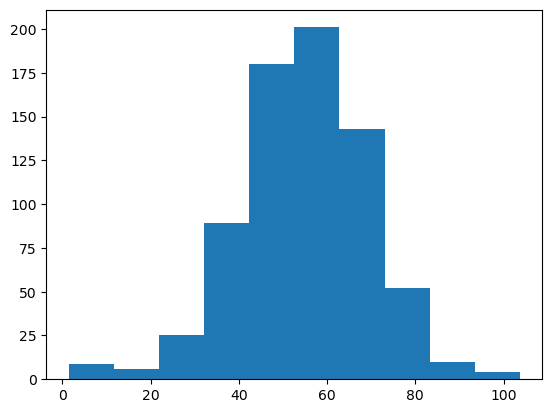

In [102]:
plt.hist(df2.loc[df2['scientific_name'] == 'Gryllus']['mfcc_3_avg'])

(array([ 1.,  5., 21., 36., 48., 47., 33., 21.,  7.,  4.]),
 array([ 4.65421391, 13.82860184, 23.00299072, 32.17737961, 41.35176468,
        50.52615356, 59.70054245, 68.87493134, 78.04931641, 87.22370911,
        96.39809418]),
 <BarContainer object of 10 artists>)

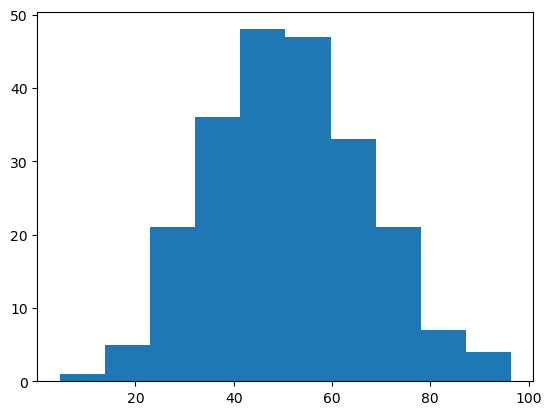

In [103]:
plt.hist(df2.loc[df2['scientific_name'] == 'Gryllus rubens']['mfcc_3_avg'])

(array([ 4., 21., 17., 15., 28., 42., 48., 35.,  7.,  3.]),
 array([  2.00001287,  14.86105633,  27.7220993 ,  40.58314133,
         53.44418335,  66.30522919,  79.1662674 ,  92.02731323,
        104.88835907, 117.74939728, 130.61044312]),
 <BarContainer object of 10 artists>)

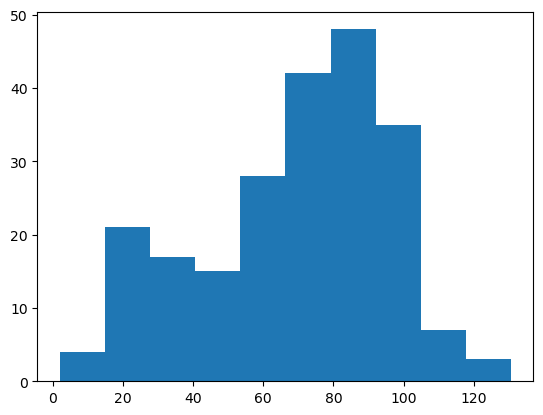

In [104]:
plt.hist(df2.loc[df2['scientific_name'] == 'Oecanthus quadripunctatus']['mfcc_3_avg'])